<a href="https://colab.research.google.com/github/datle2403/datle2403/blob/master/pythonProject/SVD/SVD_FINAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
from numpy.linalg import eig
from sympy import *
import os
from  numpy.linalg import  svd
from matplotlib.image import imread
import matplotlib.pyplot as plt
from PIL import Image
import sys

In [13]:
def SVD(matrix):
  m,n=matrix.shape
  signal=True
  if m>n: # tim U sau do tim V # neu m khong lon hon n thi xuong else
    new=matrix.dot(matrix.T) # AAT
    signal=False
  else: # tim V sau do tim U
    new=matrix.T.dot(matrix) # ATA
  # signal = True neu m>n la sai
  w,v=eig(new)
  w=w.astype('float')
  w[np.isclose(w, 0, atol=10**-5)] = 0
  idx=w.argsort()[::-1]
  w=w[idx]
  v=v[:,idx]
  m1=np.sqrt(w)
  print(len(m1))
  sigma_matrix=np.zeros((m,n))
  np.fill_diagonal(sigma_matrix,m1)
  right_matrix=np.zeros((n,n))
  left_matrix=np.zeros((m,m))
  if signal==True:
    right_matrix=v.transpose()
    for x in range(m):
      left_matrix[x]=((np.dot(matrix,v[:,x]))/m1[x])
    left_matrix=left_matrix.T
  if signal==False:
    left_matrix=v
    for x in range(n):
      right_matrix[x]=((np.dot(matrix.T,v[:,x]))/m1[x])
    right_matrix=right_matrix.T
  return left_matrix,sigma_matrix,right_matrix,m1
# a=np.array([[1,0,1],[-2,1,0]])
# b=a.T
# SVD(b)

(416, 416)
416
416
rank: 1 error: 6107.887759185158
(416, 416)


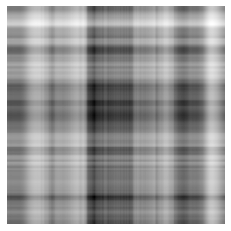

rank: 10 error: 2239.3073744450244
(416, 416)


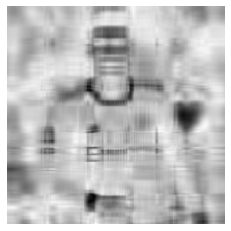

rank: 20 error: 1315.5331225908078
(416, 416)


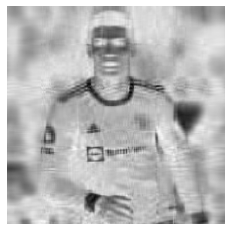

rank: 30 error: 930.3210755044531
(416, 416)


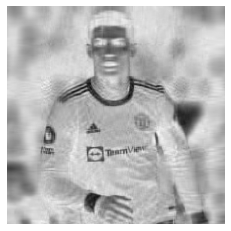

rank: 50 error: 582.804279157019
(416, 416)


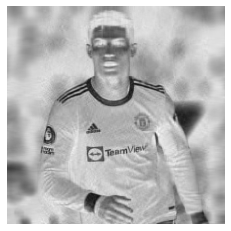

rank: 75 error: 383.3628589292654
(416, 416)


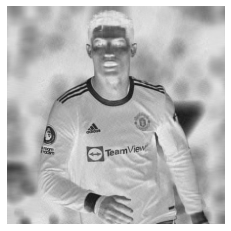

rank: 100 error: 265.0602268367495
(416, 416)


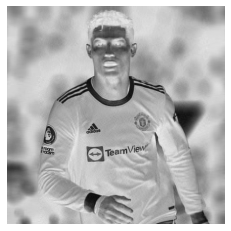

rank: 410 error: 0.19033711075512344
(416, 416)


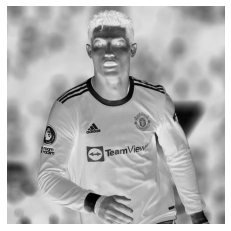

In [26]:
A=imread('124.jpeg')
X=np.mean(A,-1) # convert to gray scale
print(X.shape)
# print(X.shape)
U,S,V,m1=SVD(X)
V=np.array(V,dtype=float)
# print(V)
j=0
# rank(U,V,m1)
print(len(m1))
for r in 1,10,20,30,50,75,100,410:
    print('rank:',r,'error:',m1[r+1])
    x_approx=U[:,:r] @ S[0:r,:r] @ V[:r,:]
    print(x_approx.shape)
    plt.figure(j+1)
    j+=1
    img = plt.imshow(256 - x_approx)
    img.set_cmap('gray')
    plt.axis('off')
    plt.show()